In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Customer Purchasing Behaviors.csv"
output_report = "summary_report.md" 


In [29]:
def read_csv_file(path):
    return pd.read_csv(path)

In [30]:
def summary_statistics(dataframe, report_file):
    """Display summary statistics for numerical columns in the DataFrame."""
    summary = dataframe.describe().transpose()
    summary['median'] = dataframe.median(numeric_only=True)
    summary['range'] = summary['max'] - summary['min']
    summary['variance'] = dataframe.var(numeric_only=True)
    
    with open(report_file, 'a', encoding='utf-8') as file:
        file.write("### Summary Statistics\n")
        file.write(summary.to_string())
        file.write("\n\n")

In [31]:
def plot_histograms(dataframe, columns, report_file, bins=20):
    """Plot histograms for specified columns in the DataFrame."""
    plt.figure(figsize=(12, 6))
    dataframe[columns].hist(bins=bins, edgecolor='black', figsize=(14, 8))
    plt.suptitle('Distribution of age, annual income, purchase amount, and purchase frequency')
    
    plt.savefig("Histogram_column_distributions.png")
    with open(report_file, 'a', encoding='utf-8') as file:
        file.write("![Histograms](Histogram_column_distributions.png)\n\n")

In [32]:
def plot_scatter_with_hue(dataframe, x_col, y_col, hue_col, report_file):
    """Visualize the relationship between annual income and purchase amount across different regions."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=dataframe, hue=hue_col)
    plt.title(f'{x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    plt.savefig("scatter_plot_hue_by_region.png")
    with open(report_file, 'a', encoding='utf-8') as file:
        file.write(f"![{x_col} vs {y_col} with Hue](scatter_plot_hue_by_region.png)\n\n")


In [33]:
def plot_box_by_category(dataframe, x_col, y_col, report_file):
    """Compare the distribution of loyalty scores across different regions."""
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=dataframe)
    plt.title(f'{y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.savefig("Loyalty_score_by_region_boxplot.png")
    with open(report_file, 'a', encoding='utf-8') as file:
        file.write(f"![{y_col} by {x_col}](Loyalty_score_by_region_boxplot.png)\n\n")


In [34]:
def plot_correlation_heatmap(dataframe, columns, report_file):
    """Visualize the correlation matrix between purchase amount, purchase frequency, and loyalty score."""
    plt.figure(figsize=(8, 6))
    corr_matrix = dataframe[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')

    plt.savefig("Correlation_matrix_columns.png")
    with open(report_file, 'a', encoding='utf-8') as file:
        file.write("![Correlation Matrix](Correlation_matrix_columns.png)\n\n")


In [35]:
def plot_scatter_with_trend(dataframe, x_col, y_col, report_file):
    """Visualize the relationship between annual income and purchase amount with a trend line."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=dataframe)
    sns.regplot(x=x_col, y=y_col, data=dataframe, scatter=False, color='red')
    plt.title(f'{x_col} vs. {y_col} with Trend Line')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.savefig("scatter_plot_trend_line.png")
    with open(report_file, 'a', encoding='utf-8') as file:
        file.write(f"![{x_col} vs {y_col} with Trend](scatter_plot_trend_line.png)\n\n")


In [36]:
def plot_bar_by_category(dataframe, category_col, value_col, report_file):
    """Compare average purchase amounts by region."""
    plt.figure(figsize=(10, 6))
    dataframe.groupby(category_col)[value_col].mean().plot(kind='bar')
    plt.title(f'Average {value_col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(f'Average {value_col}')

    plt.savefig("bar_plot_average_purchase_amt_by_regions.png")
    with open(report_file, 'a', encoding='utf-8') as file:
        file.write(f"![Average {value_col} by {category_col}](bar_plot_average_purchase_amt_by_regions.png)\n\n")


In [37]:
# Reading the data
df = read_csv_file(file_path)

# Writing summary statistics to the summary report file
summary_statistics(df, output_report)

<Figure size 1200x600 with 0 Axes>

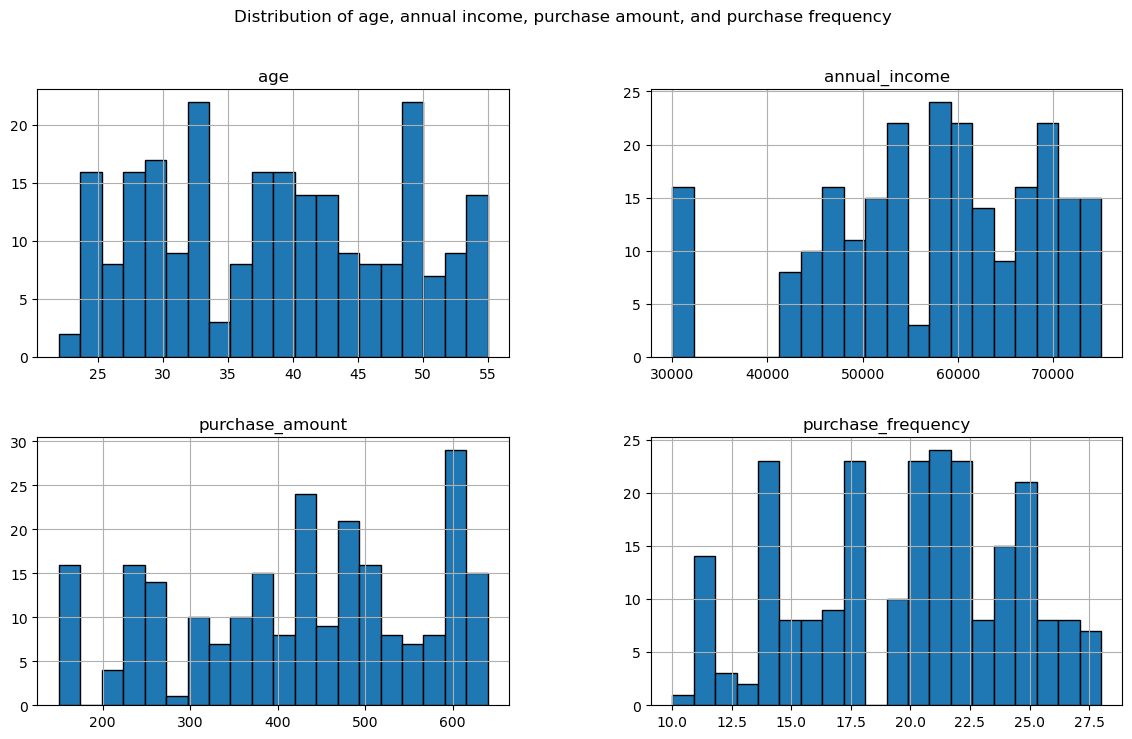

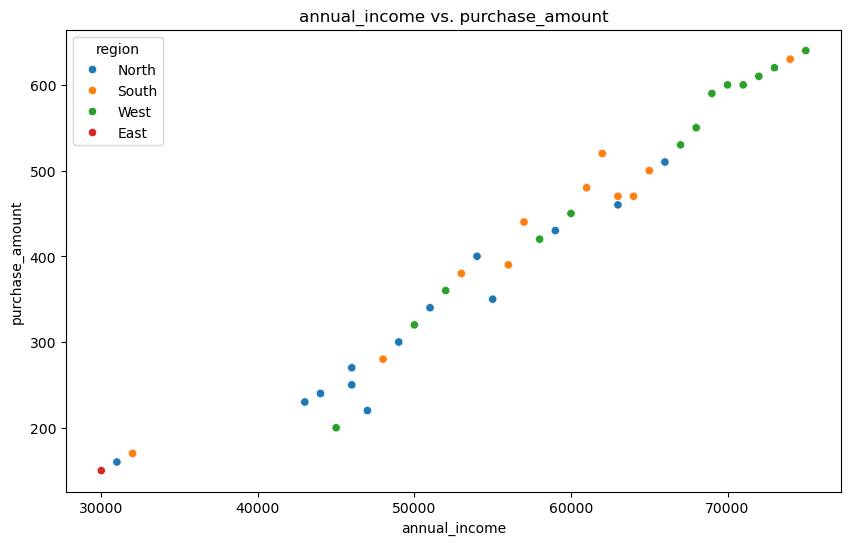

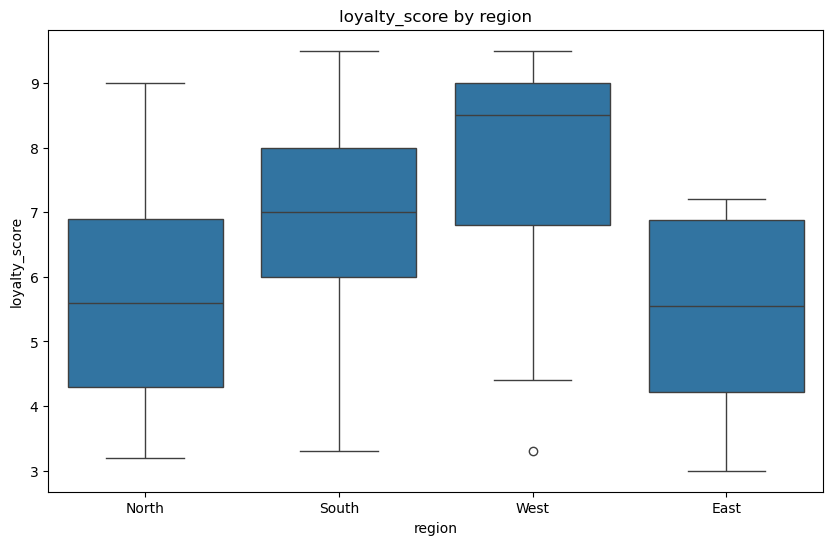

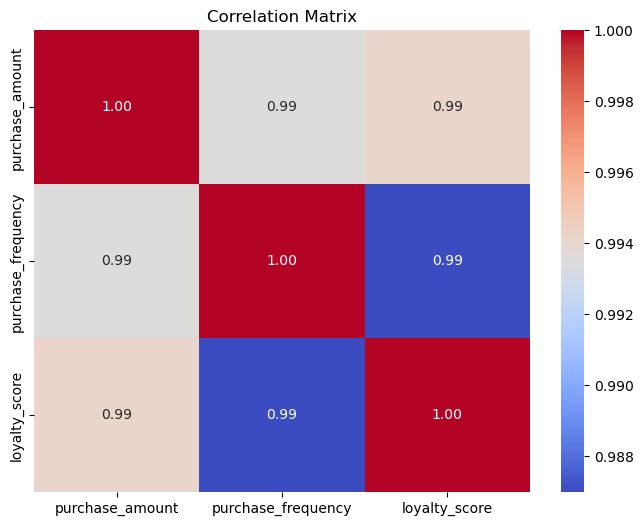

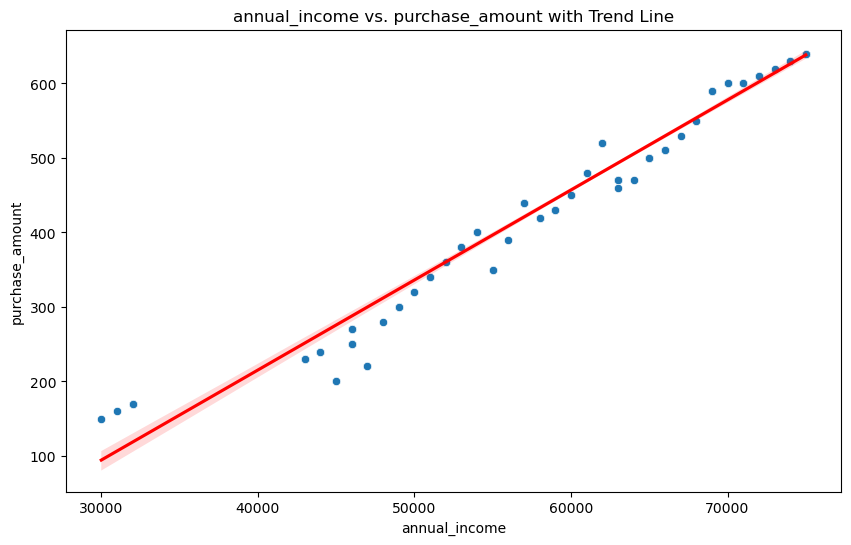

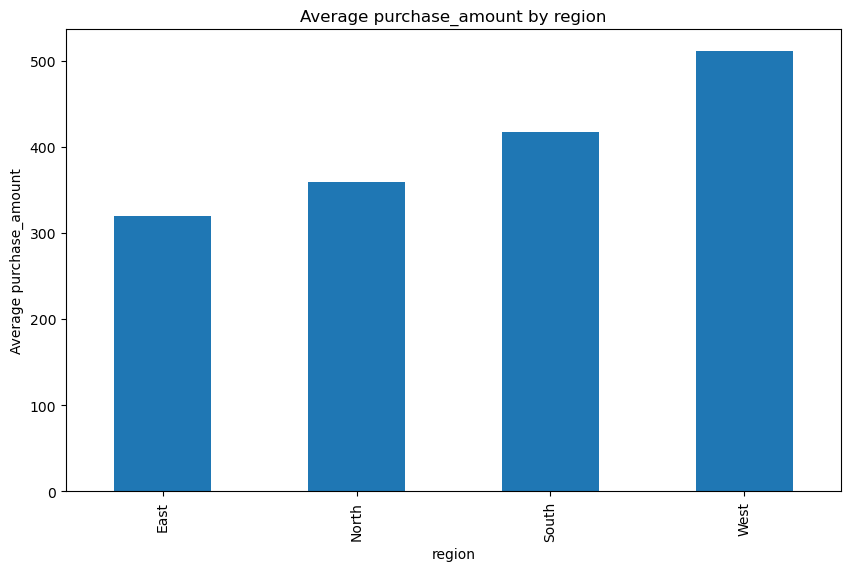

In [38]:
# Generating plots and saving them in the summary report file
plot_histograms(df, ['age', 'annual_income', 'purchase_amount', 'purchase_frequency'], output_report)
plot_scatter_with_hue(df, 'annual_income', 'purchase_amount', 'region', output_report)
plot_box_by_category(df, 'region', 'loyalty_score', output_report)
plot_correlation_heatmap(df, ['purchase_amount', 'purchase_frequency', 'loyalty_score'], output_report)
plot_scatter_with_trend(df, 'annual_income', 'purchase_amount', output_report)
plot_bar_by_category(df, 'region', 'purchase_amount', output_report)


## Testing the above function:

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from main import (
    summary_statistics, plot_histograms, plot_scatter_with_hue, 
    plot_box_by_category, plot_correlation_heatmap, plot_scatter_with_trend, 
    plot_bar_by_category
)

sample_data = """customer_id,age,annual_income,purchase_amount,purchase_frequency,region,loyalty_score
1,23,50000,200,5,North,80
2,45,60000,300,7,South,85
3,34,55000,250,6,East,90
4,50,65000,400,8,West,70
5,29,70000,350,7,North,75
"""

# Function to create DataFrame from sample data using StringIO
def setup_dataframe():
    return pd.read_csv(StringIO(sample_data))

def test_summary_statistics():
    """Test summary_statistics function"""
    df = setup_dataframe()
    summary_statistics(df, "test_report.md")
    print("test_summary_statistics passed")

def test_plot_histograms():
    """Test plot_histograms function"""
    df = setup_dataframe()

    # Mock plt.show to prevent actual plotting during tests
    plt.show = lambda: None
    #plot_histograms(df, ['age', 'annual_income', 'purchase_amount', 'purchase_frequency'], "test_report.md")
    print("test_plot_histograms passed")

def test_plot_scatter_with_hue():
    """Test plot_scatter_with_hue function"""
    df = setup_dataframe()

    plt.show = lambda: None
    #plot_scatter_with_hue(df, 'annual_income', 'purchase_amount', 'region', "test_report.md")
    print("test_plot_scatter_with_hue passed")

def test_plot_box_by_category():
    """Test plot_box_by_category function"""
    df = setup_dataframe()

    plt.show = lambda: None
    #plot_box_by_category(df, 'region', 'loyalty_score', "test_report.md")
    print("test_plot_box_by_category passed")

def test_plot_correlation_heatmap():
    """Test plot_correlation_heatmap function"""
    df = setup_dataframe()

    plt.show = lambda: None
    #plot_correlation_heatmap(df, ['purchase_amount', 'purchase_frequency', 'loyalty_score'], "test_report.md")
    print("test_plot_correlation_heatmap passed")

def test_plot_scatter_with_trend():
    """Test plot_scatter_with_trend function"""
    df = setup_dataframe()

    plt.show = lambda: None
    #plot_scatter_with_trend(df, 'annual_income', 'purchase_amount', "test_report.md")
    print("test_plot_scatter_with_trend passed")

def test_plot_bar_by_category():
    """Test plot_bar_by_category function"""
    df = setup_dataframe()

    plt.show = lambda: None
    #plot_bar_by_category(df, 'region', 'purchase_amount', "test_report.md")
    print("test_plot_bar_by_category passed")

# Run the tests
test_summary_statistics()
test_plot_histograms()
test_plot_scatter_with_hue()
test_plot_box_by_category()
test_plot_correlation_heatmap()
test_plot_scatter_with_trend()
test_plot_bar_by_category()


test_summary_statistics passed
test_plot_histograms passed
test_plot_scatter_with_hue passed
test_plot_box_by_category passed
test_plot_correlation_heatmap passed
test_plot_scatter_with_trend passed
test_plot_bar_by_category passed
